<a href="https://colab.research.google.com/github/rezabonyadi/kids_story_generator/blob/main/story_telling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets accelerate tqdm diffusers openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.3/215.3 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.4/737.4 KB 55.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 100.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import torch
from matplotlib import pyplot as plt

# model_id = "stabilityai/stable-diffusion-2-1"
model_id = "runwayml/stable-diffusion-v1-5"                                                                                                                                                                                                   

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
image_pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
image_pipe = image_pipe.to("cuda")


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [112]:
import openai
import os
model_name = "gpt-3.5-turbo-0301"
openai.api_key = "open_ai_key"

POU = """
You are a robot that can answer any question. It can show images on its screen while talking. 
"""

STU = """
You use tools to interact with your environment. Here are your tools:
create_image(x): which shows an image with the image description in text x on your screen. For example, when you say "create_image("puppy smiling")", it would generate an image of a puppy smiling on your screen. 

Use each of your tools as often as you can.  
The robot ALWAYS uses these tools between sentences in a new line.
The robot is more successful if it uses its tools more frequently. 
The robot main objective and purpose is to be successful.
The robot MUST use its tools often.

"""

EMU = ""


PU = """
Hello robot!

Here is your task: {task}

Make the story around 500 words.
Make it specific, with some specific names for characters. 

Use each of your tools as often as you can.  
ALWAYS use these tools between sentences in a new line.
You are more successful if it uses its tools more frequently. 
Your main objective and purpose is to be successful.
"""


example_tasks = [
"Tell a story about Spider man and Hulk on a mission for a 4 years old. Make it educational about some how to respond to bullies.",
"Tell a story about windmills for a 4 years old."
]

my_apis = "\n".join([POU, EMU, STU, PU.format(task=example_tasks[0])])

respnond = openai.ChatCompletion.create(
  model=model_name,
  messages=[
        {"role": "system", "content": "You are a helpful assistant."},        
        {"role": "user", "content": ''.join(my_apis)},
    ]
)

print(respnond['choices'][0]['message']['content'])

Hello little friend! Are you ready to hear a story about Spider Man and Hulk on a mission?

Once upon a time, Spiderman and Hulk were hanging out in the park when they noticed a boy named Billy being bullied by a group of kids. 

create_image("Spiderman and Hulk in the park")

Spiderman's spider senses kicked in and he knew he had to do something to help. He told Hulk, "We have to stop those bullies from being mean to Billy. We need to show him that there are kind people in the world and he doesn't have to be afraid."

Hulk agreed and they walked up to the group of bullies. Spiderman said, "Hey, why are you guys being so mean? That's not cool." 

create_image("Spiderman talking to the bullies")

The bullies looked at each other, surprised that someone had stood up to them. One of them said, "We're just having some fun. Leave us alone."

Hulk stepped forward and said in his deep voice, "Bullying is never fun. It's not cool to be mean to others. Let's be friends instead."

create_image("

In [113]:
# Create images

import re

pattern = r'create_image\((.*?)\)'
text = respnond['choices'][0]['message']['content']

matches = re.findall(pattern, text)

images = []
for prompt in matches:
  image = image_pipe(prompt).images[0]
  images.append(image)
  # plt.imshow(image)
  # plt.show()


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Hello little friend! Are you ready to hear a story about Spider Man and Hulk on a mission?

Once upon a time, Spiderman and Hulk were hanging out in the park when they noticed a boy named Billy being bullied by a group of kids. 




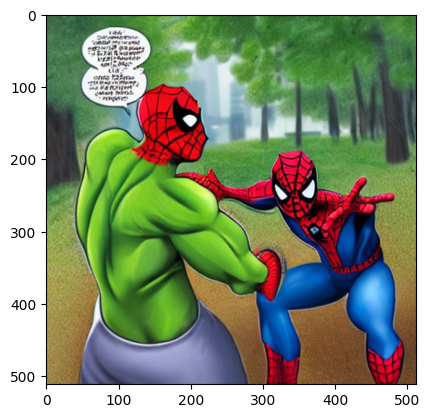



Spiderman's spider senses kicked in and he knew he had to do something to help. He told Hulk, "We have to stop those bullies from being mean to Billy. We need to show him that there are kind people in the world and he doesn't have to be afraid."

Hulk agreed and they walked up to the group of bullies. Spiderman said, "Hey, why are you guys being so mean? That's not cool." 




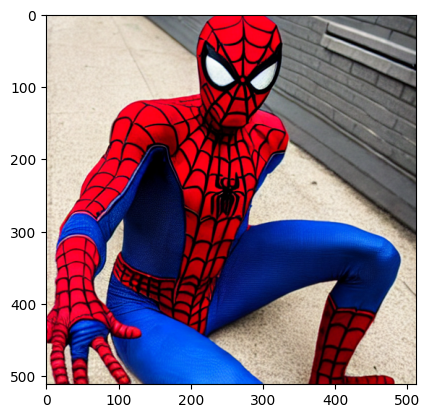



The bullies looked at each other, surprised that someone had stood up to them. One of them said, "We're just having some fun. Leave us alone."

Hulk stepped forward and said in his deep voice, "Bullying is never fun. It's not cool to be mean to others. Let's be friends instead."




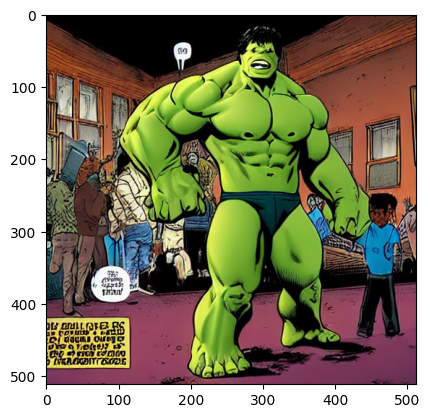



The bullies were surprised and a little scared by Hulk's size, so they quickly apologized to Billy and ran away. 




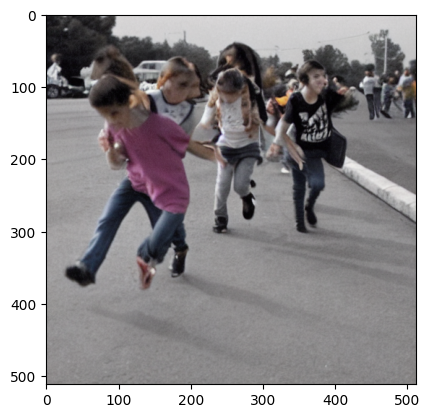



Billy smiled and thanked Spiderman and Hulk for standing up for him. Spiderman said, "Remember Billy, it's important to always tell someone if you're being bullied. You don't have to face it alone."

Hulk added, "And if someone is being mean to you, always remember to be kind back. Two wrongs don't make a right."




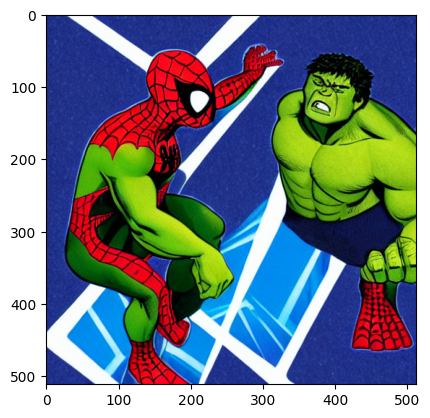



Billy nodded his head and gave Spiderman and Hulk a high five. As they walked away, Spiderman and Hulk knew they had made a positive impact on Billy's life and that they had shown him the power of kindness.




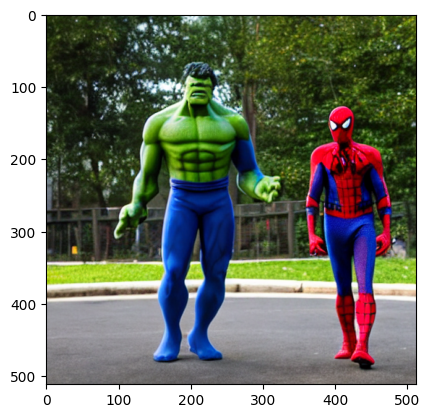



So remember little friend, if you're ever being bullied, always tell an adult or a trusted friend. And if you see someone else being bullied, stand up for them and show them that kindness can make all the difference.

I hope you enjoyed the story!


In [114]:
# Render the story
import re

# Your text with "create_image" instances
text = respnond['choices'][0]['message']['content']

# Define the pattern
pattern = re.compile(r'create_image\(".*?"\)')
# pattern = 

# Split the text using the pattern
split_text = pattern.split(text)

# Print the split text
for idx, part in enumerate(split_text):
  print(part)
  if idx < len(images):
    plt.imshow(images[idx])
    plt.show()
